In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture


## Introducción

**Problema de Negocio:** En  una  empresa  de  comercio  electrónico,  es  fundamental  comprender  mejor  a  los clientes  para  optimizar  las  estrategias  de  marketing  y  mejorar  la  experiencia  del usuario. La segmentación de clientes permite identificar grupos específicos de usuarios con  comportamientos  similares,  lo  que  facilita  la  personalización  de  campañas  y  la toma de decisiones estratégicas.

**Objetivo del Desafío:** El objetivo es segmentar a los clientes del sitio web en grupos distintos basándose en su  comportamiento  y  características.  Esta  segmentación  ayudará  a  la  empresa  a diseñar campañas de marketing más efectivas y mejorar la retención de clientes.

**Descripción del Desafío:** Te  proporcionamos  una  base  de  datos con información  sobre  la  actividad  de  los visitantes  en  el  sitio  webprovenientes  de  Google  Analytics.  Los  datos  disponibles incluyen:

-fullVisitorId: Identificador único del visitante.

•channelGrouping: Canal de agrupación (ej. orgánico, pagado, etc.).

•weekend_prop: Proporción de visitas durante el fin de semana.

•hour: Hora de la visita.

•sessionId: Identificador de la sesión.

•device.browser: Navegador del dispositivo.

•device.deviceCategory: Categoría del dispositivo (desktop, móvil, tablet).

•device.isMobile: Indica si el dispositivo es móvil.

•device.operatingSystem: Sistema operativo del dispositivo.

•totals.hits: Total de hits(interacciones)en la sesión.

•totals.pageviews: Total de páginas vistas en la sesión.

•bounce_prop: Proporción de rebotes.

•trafficSource.medium: Medio de tráfico (orgánico, referenciado, etc.).

## Análisis Exploratorio de Datos

In [3]:
customer_data = pd.read_csv('data/data_customers.csv')
customer_data.head()

,fullVisitorId,channelGrouping,weekend_prop,hour,sessionId,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,totals.hits,totals.pageviews,bounce_prop,trafficSource.medium
0,213131142648941,Direct,0.000000,22.0,1,Chrome,desktop,0.0,Macintosh,14.0,13.0,0.0,(none)
1,435324061339869,Referral,0.666667,21.0,3,Chrome,desktop,0.0,Macintosh,14.0,11.0,0.0,referral
2,562678147042735,Organic Search,0.000000,14.0,2,Chrome,desktop,0.0,Macintosh,12.5,10.5,0.0,organic
3,585708896049892,Referral,0.000000,20.0,1,Chrome,desktop,0.0,Linux,22.0,20.0,0.0,referral
4,670722016498267,Referral,0.000000,17.0,2,Chrome,desktop,0.0,Linux,9.5,9.5,0.0,referral


In [4]:
# Dimensiones del dataset
customer_data.shape

(9996, 13)

In [5]:
# Información del dataset
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fullVisitorId           9996 non-null   uint64 
 1   channelGrouping         9996 non-null   object 
 2   weekend_prop            9996 non-null   float64
 3   hour                    9996 non-null   float64
 4   sessionId               9996 non-null   int64  
 5   device.browser          9996 non-null   object 
 6   device.deviceCategory   9996 non-null   object 
 7   device.isMobile         9996 non-null   float64
 8   device.operatingSystem  9996 non-null   object 
 9   totals.hits             9996 non-null   float64
 10  totals.pageviews        9996 non-null   float64
 11  bounce_prop             9996 non-null   float64
 12  trafficSource.medium    9996 non-null   object 
dtypes: float64(6), int64(1), object(5), uint64(1)
memory usage: 1015.3+ KB


In [6]:
# Resumen estadístico
customer_data.describe()

,fullVisitorId,weekend_prop,hour,sessionId,device.isMobile,totals.hits,totals.pageviews,bounce_prop
count,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,4.478856e+18,0.147011,14.449030,3.606443,0.096870,22.177771,17.530312,0.082718
std,3.066153e+18,0.296219,6.261204,6.074226,0.295655,21.916773,16.259149,0.162298
min,2.131311e+14,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,1.577139e+18,0.000000,11.000000,1.000000,0.000000,9.000000,8.000000,0.000000
50%,4.346933e+18,0.000000,16.500000,2.000000,0.000000,17.000000,14.000000,0.000000
75%,7.132082e+18,0.126359,19.000000,4.000000,0.000000,28.000000,22.500000,0.083333
max,9.998996e+18,1.000000,23.000000,278.000000,1.000000,500.000000,466.000000,0.925373


In [7]:
# Numero de visitantes unicos
len(customer_data['fullVisitorId'].unique())


9996

In [8]:
len(customer_data['sessionId'].unique())

54

In [9]:
#  Verificar valores nulos
print("\nValores nulos por columna:")
print(customer_data.isnull().sum())


Valores nulos por columna:
fullVisitorId             0
channelGrouping           0
weekend_prop              0
hour                      0
sessionId                 0
device.browser            0
device.deviceCategory     0
device.isMobile           0
device.operatingSystem    0
totals.hits               0
totals.pageviews          0
bounce_prop               0
trafficSource.medium      0
dtype: int64



Distribución de channelGrouping:
channelGrouping
Referral          0.428772
Organic Search    0.323429
Direct            0.185074
Paid Search       0.040016
Display           0.014106
Name: proportion, dtype: float64


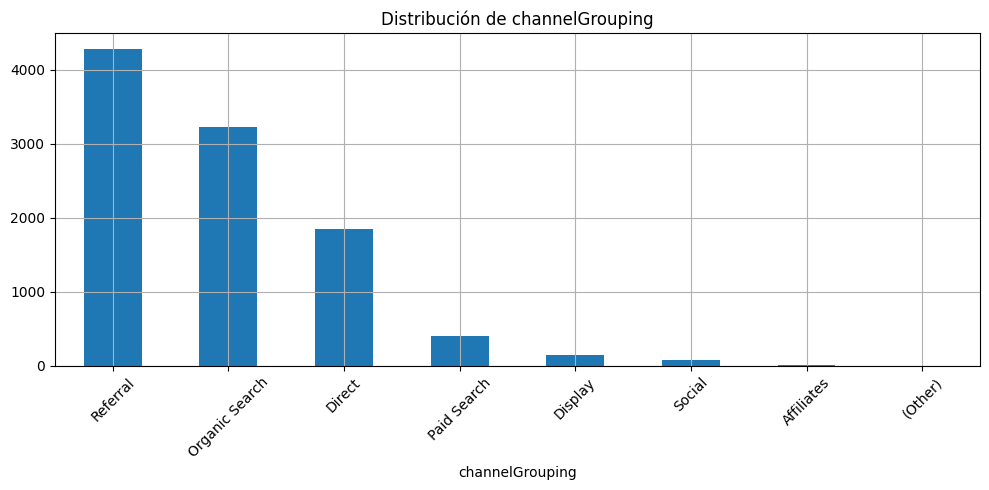


Distribución de device.browser:
device.browser
Chrome               0.894058
Safari               0.072729
Firefox              0.016106
Internet Explorer    0.009504
Edge                 0.005202
Name: proportion, dtype: float64


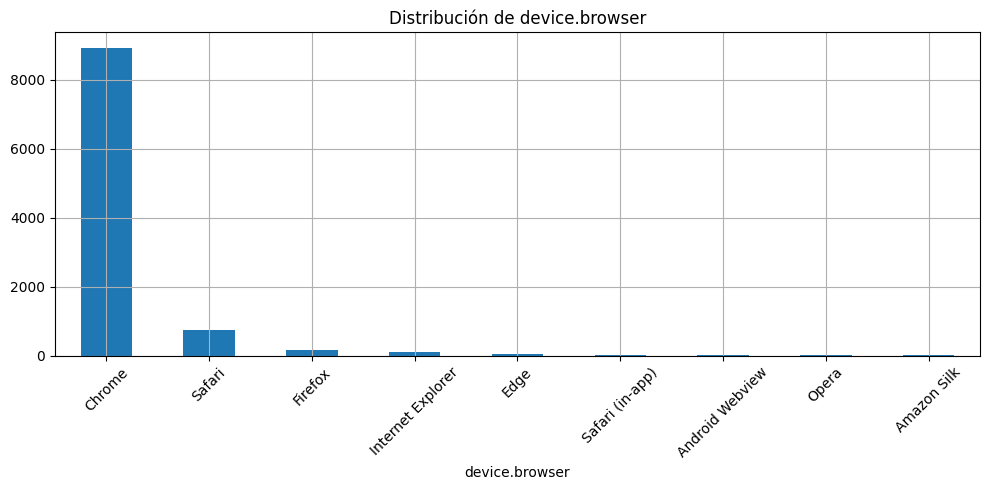


Distribución de device.deviceCategory:
device.deviceCategory
desktop    0.903061
mobile     0.080932
tablet     0.016006
Name: proportion, dtype: float64


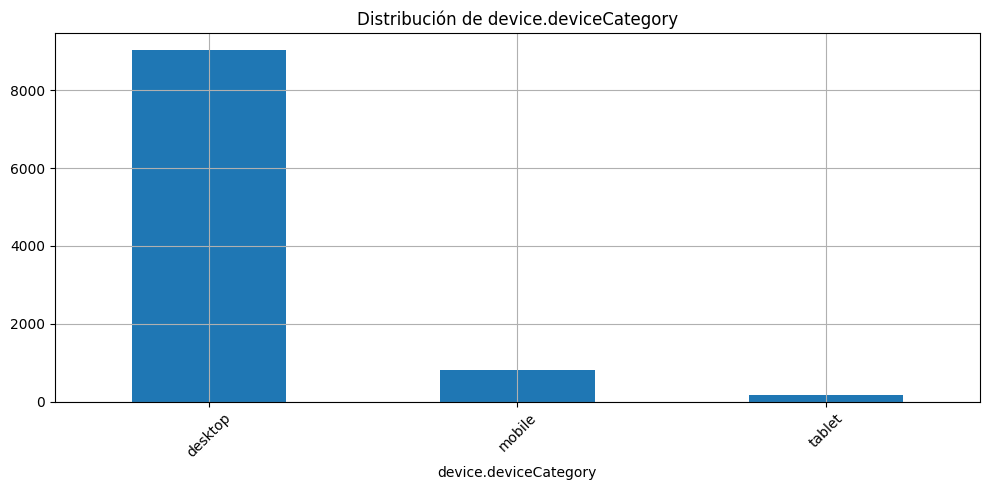


Distribución de device.operatingSystem:
device.operatingSystem
Macintosh    0.555322
Windows      0.199180
Chrome OS    0.076831
Linux        0.073229
iOS          0.051921
Name: proportion, dtype: float64


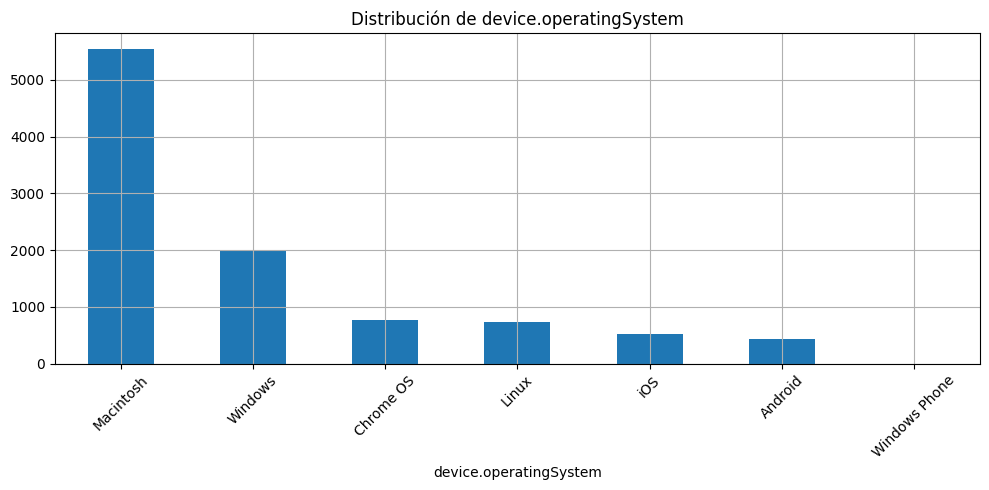


Distribución de trafficSource.medium:
trafficSource.medium
referral    0.436675
organic     0.315926
(none)      0.184874
cpc         0.047519
cpm         0.013806
Name: proportion, dtype: float64


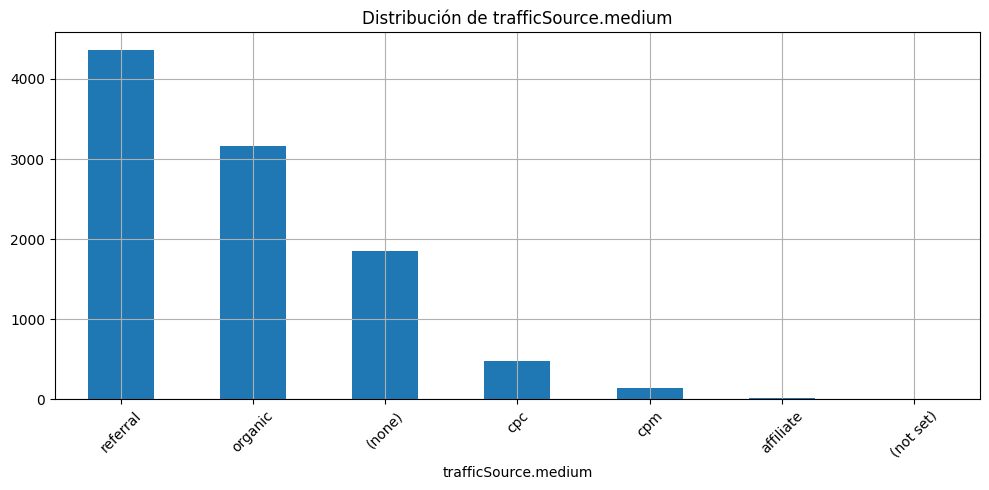

In [10]:
#  Análisis de variables categóricas
categorical_cols = ['channelGrouping', 'device.browser', 'device.deviceCategory', 
                   'device.operatingSystem', 'trafficSource.medium']

for col in categorical_cols:
    print(f"\nDistribución de {col}:")
    print(customer_data[col].value_counts(normalize=True).head())
    
    # Visualización
    plt.figure(figsize=(10, 5))
    customer_data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid()
    plt.show()

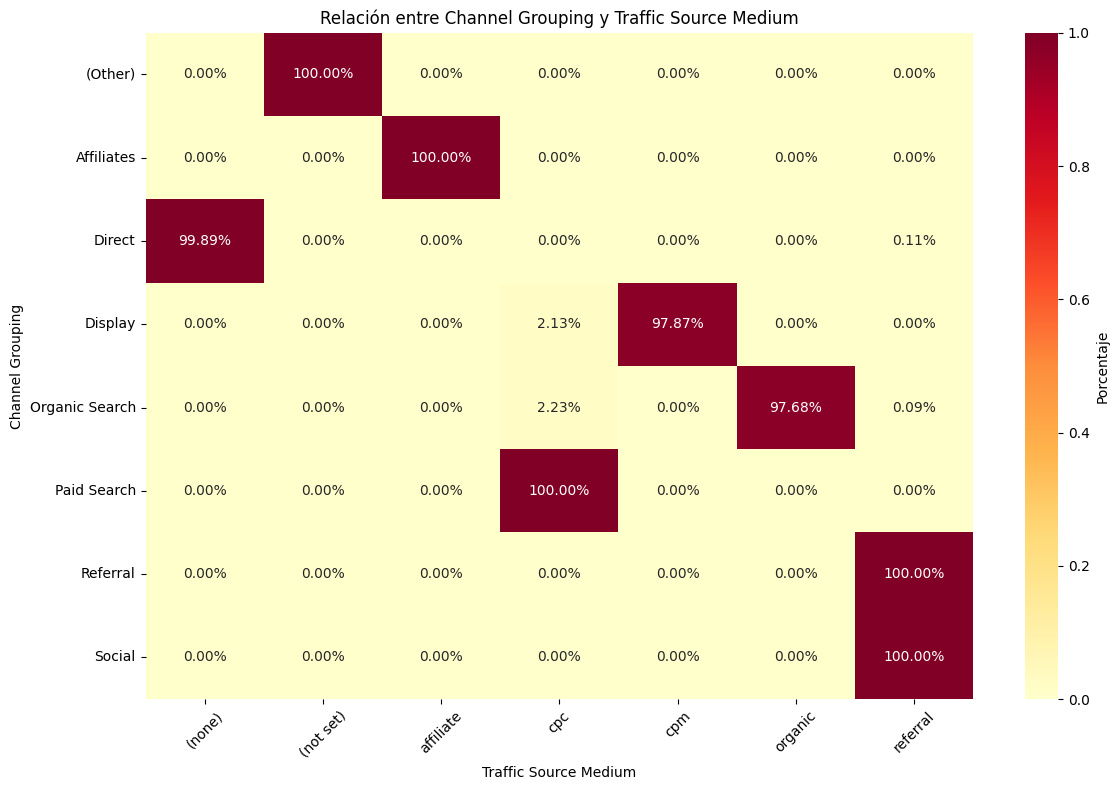


Número absoluto de casos:
trafficSource.medium  (none)  (not set)  affiliate  cpc  cpm  organic  \
channelGrouping                                                         
(Other)                    0          1          0    0    0        0   
Affiliates                 0          0         11    0    0        0   
Direct                  1848          0          0    0    0        0   
Display                    0          0          0    3  138        0   
Organic Search             0          0          0   72    0     3158   
Paid Search                0          0          0  400    0        0   
Referral                   0          0          0    0    0        0   
Social                     0          0          0    0    0        0   

trafficSource.medium  referral  
channelGrouping                 
(Other)                      0  
Affiliates                   0  
Direct                       2  
Display                      0  
Organic Search               3  
Paid Search

In [11]:
# Tabla de contigencia para entender mejor las variables channelGrouping y traffic source
cross_tab = pd.crosstab(customer_data['channelGrouping'], 
                        customer_data['trafficSource.medium'],
                        normalize='index')  


plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, 
            annot=True,  
            fmt='.2%', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Porcentaje'})

plt.title('Relación entre Channel Grouping y Traffic Source Medium')
plt.xlabel('Traffic Source Medium')
plt.ylabel('Channel Grouping')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nNúmero absoluto de casos:")
print(pd.crosstab(customer_data['channelGrouping'], 
                  customer_data['trafficSource.medium']))


Distribución de weekend_prop:
weekend_prop
0.000000    0.728992
1.000000    0.079432
0.500000    0.045018
0.333333    0.030712
0.250000    0.018207
Name: proportion, dtype: float64


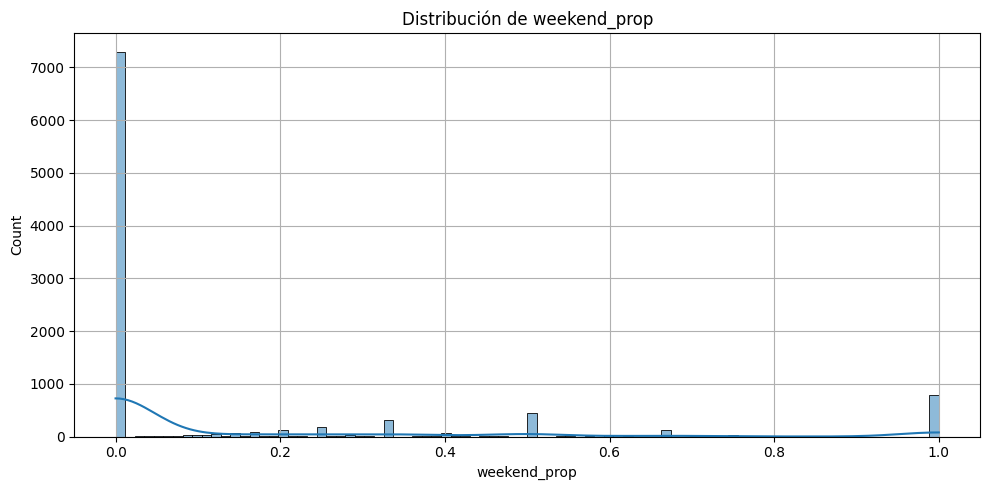


Distribución de hour:
hour
17.0    0.083433
18.0    0.080632
19.0    0.070528
16.0    0.066627
20.0    0.057123
Name: proportion, dtype: float64


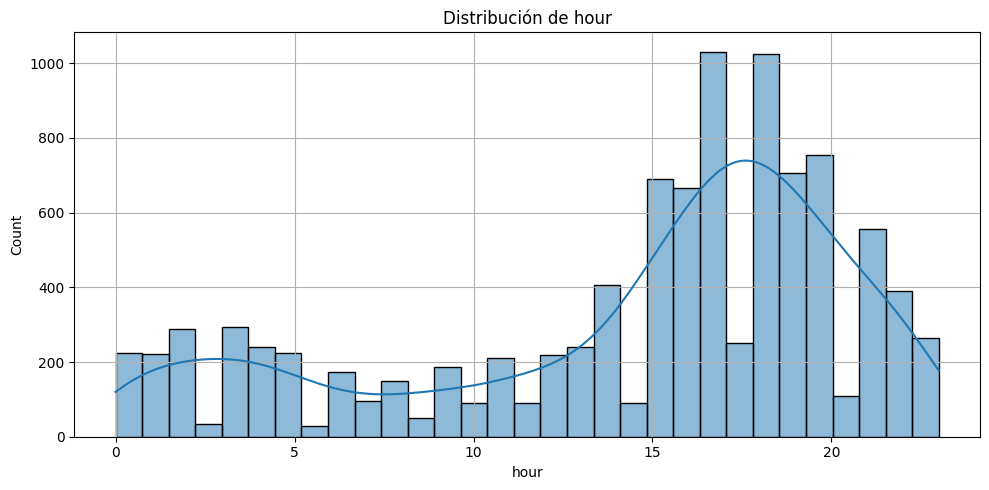


Distribución de totals.hits:
totals.hits
14.0    0.028411
5.0     0.027511
7.0     0.026411
3.0     0.026210
6.0     0.025910
Name: proportion, dtype: float64


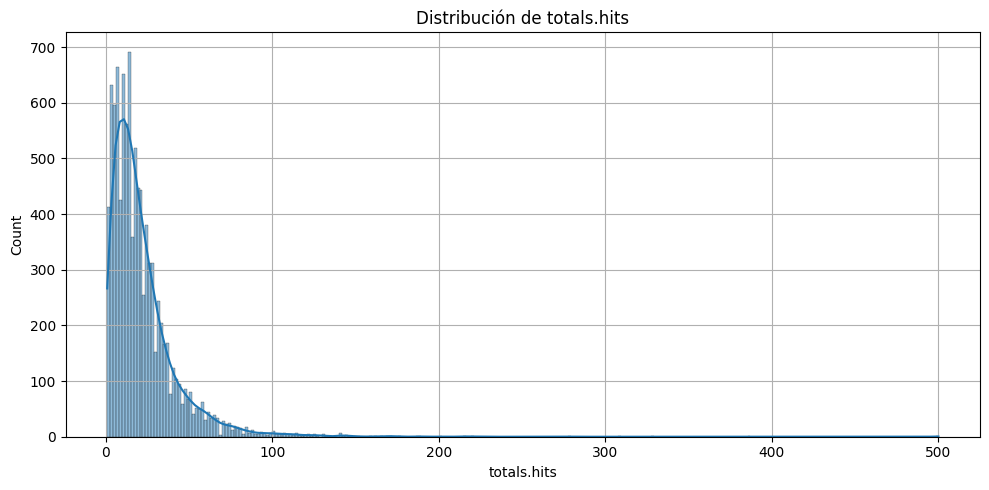


Distribución de totals.pageviews:
totals.pageviews
4.0     0.033113
5.0     0.032213
6.0     0.031813
14.0    0.031313
11.0    0.031112
Name: proportion, dtype: float64


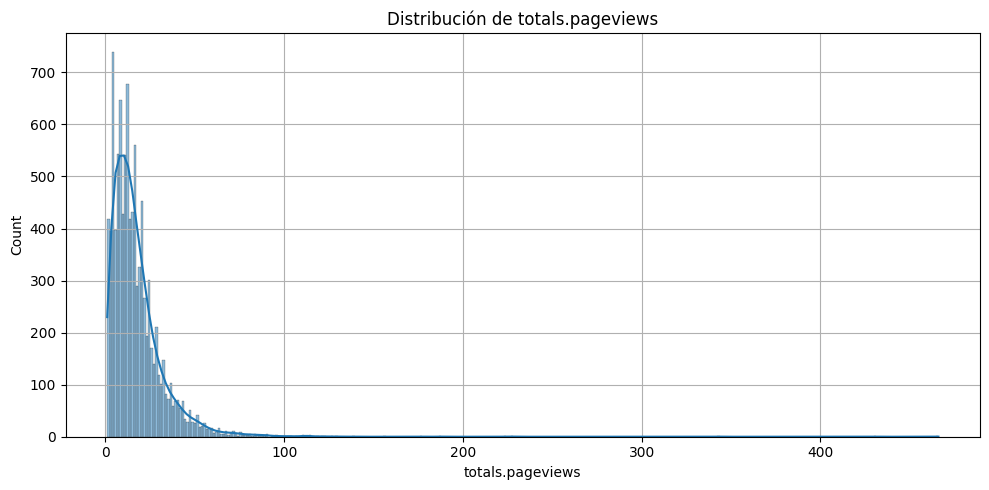


Distribución de bounce_prop:
bounce_prop
0.000000    0.743197
0.500000    0.050020
0.333333    0.044718
0.250000    0.033713
0.200000    0.023009
Name: proportion, dtype: float64


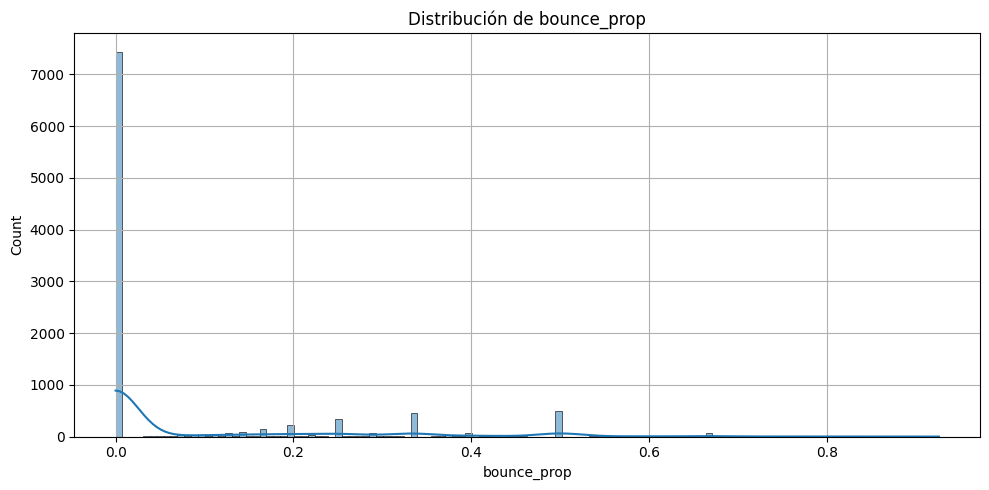

In [12]:
numeric_cols = ['weekend_prop', 'hour', 'totals.hits', 'totals.pageviews', 'bounce_prop']


for col in numeric_cols:
    print(f"\nDistribución de {col}:")
    print(customer_data[col].value_counts(normalize=True).head())
    
    plt.figure(figsize=(10, 5))
    sns.histplot(customer_data[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()
    plt.grid()
    plt.show()

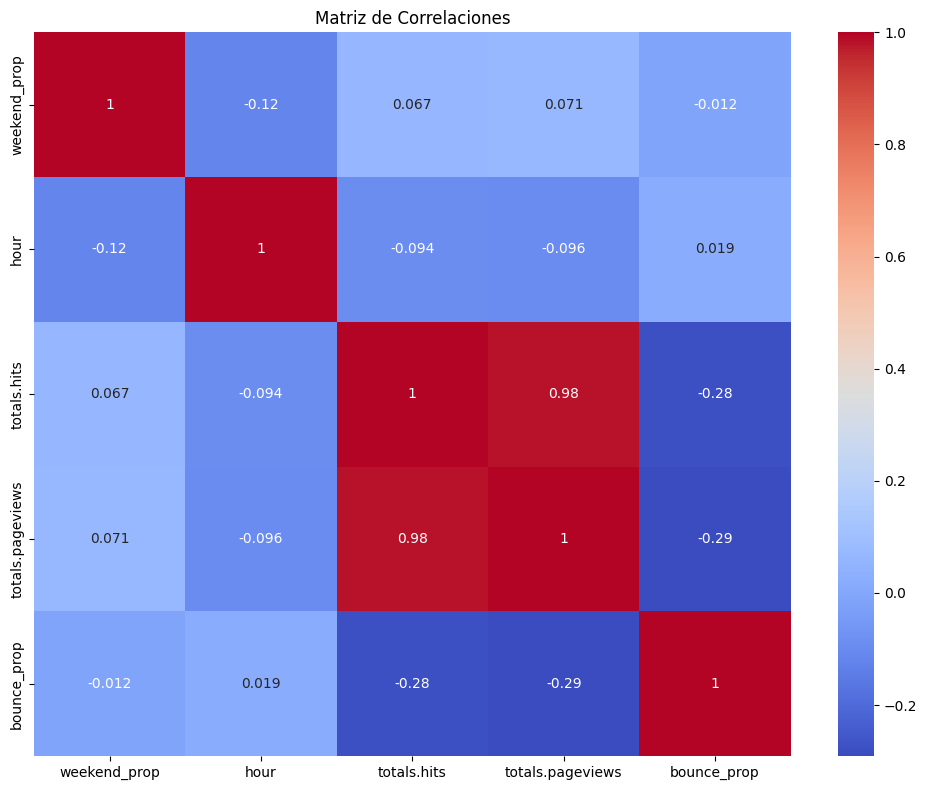

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(customer_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.tight_layout()
plt.show()

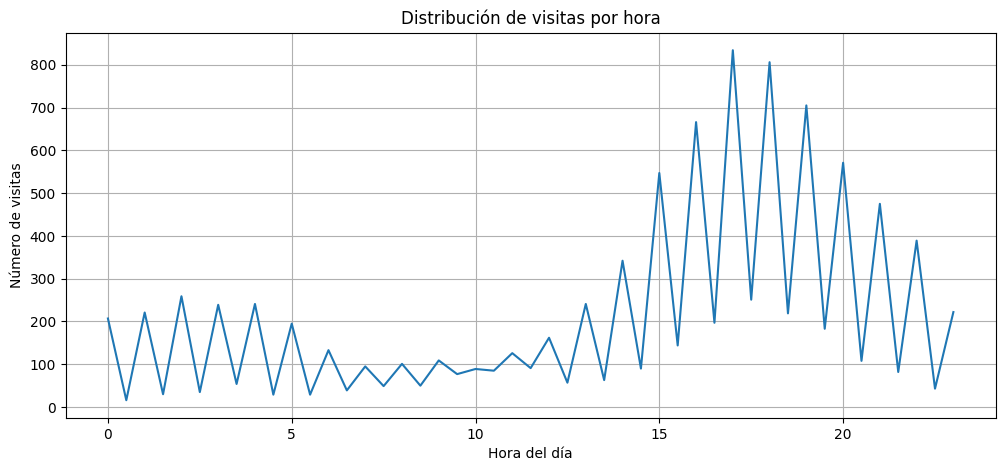

In [13]:
#  Análisis de patrones temporales
plt.figure(figsize=(12, 5))
customer_data.groupby('hour')['fullVisitorId'].count().plot(kind='line')
plt.title('Distribución de visitas por hora')
plt.xlabel('Hora del día')
plt.ylabel('Número de visitas')
plt.grid(True)
plt.show()

<Figure size 1200x1200 with 0 Axes>

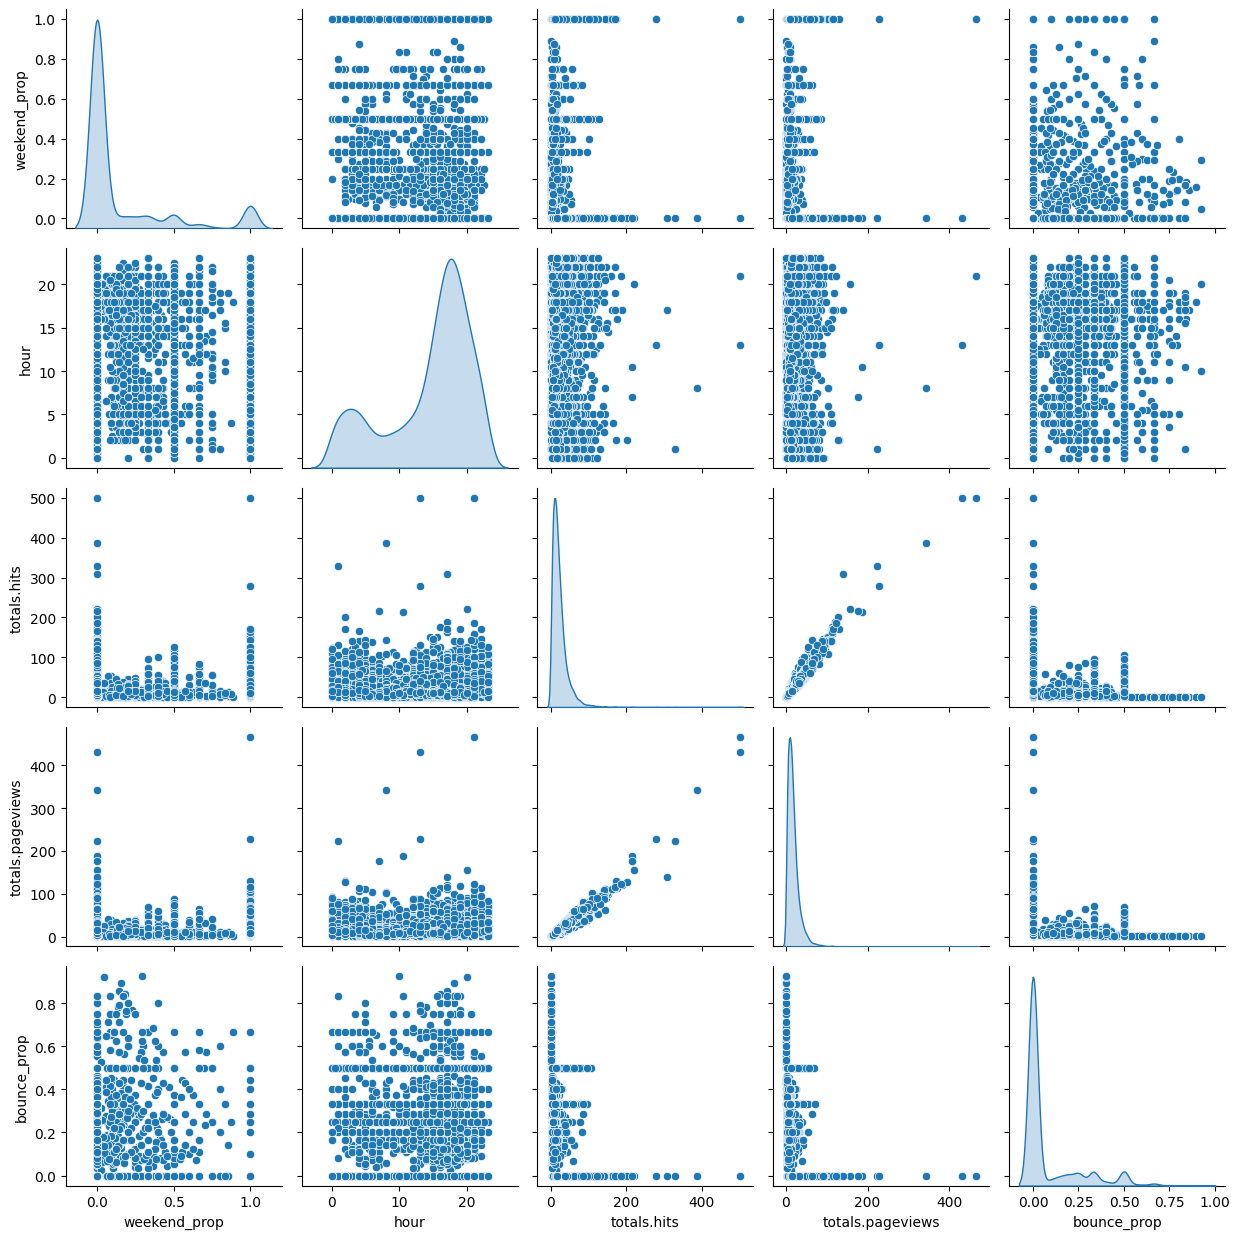

In [14]:
plt.figure(figsize=(12, 12))
sns.pairplot(customer_data[numeric_cols], diag_kind='kde')
plt.tight_layout()
plt.grid()
plt.show()

## Preprocesamiento de Datos

In [15]:
numerical_columns = ['weekend_prop', 'hour', 'totals.hits', 'totals.pageviews', 'bounce_prop']

In [16]:
# Transformaciones no lineales para las variables numéricas
for col in numerical_columns:
    customer_data[f'{col}_sqrt'] = np.sqrt(customer_data[col])
    customer_data[f'{col}_log'] = np.log(customer_data[col])
    # customer_data[f'{col}_exp'] = np.exp(customer_data[col])
    customer_data[f'{col}_tanh'] = np.tanh(customer_data[col]/ 100)

/Users/tul-admin/Desktop/brain-food-interview/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tul-admin/Desktop/brain-food-interview/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tul-admin/Desktop/brain-food-interview/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

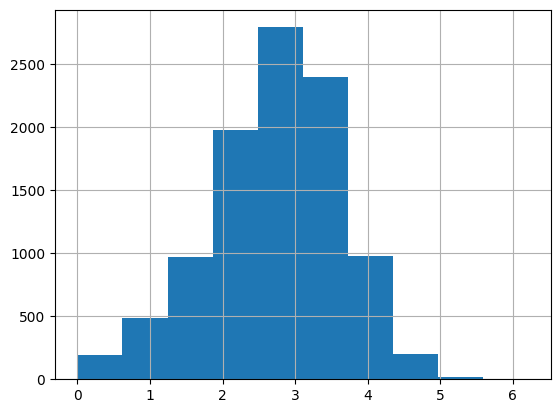

In [17]:
customer_data["totals.hits_log"].hist()

In [18]:
customer_data["bounce_prop"].value_counts()

bounce_prop
0.000000    7429
0.500000     500
0.333333     447
0.250000     337
0.200000     230
            ... 
0.842105       1
0.227273       1
0.320000       1
0.565217       1
0.642857       1
Name: count, Length: 135, dtype: int64

In [19]:
customer_data["weekend_prop"].value_counts()

weekend_prop
0.000000    7287
1.000000     794
0.500000     450
0.333333     307
0.250000     182
            ... 
0.046154       1
0.293532       1
0.131783       1
0.086957       1
0.705882       1
Name: count, Length: 104, dtype: int64

<Axes: >

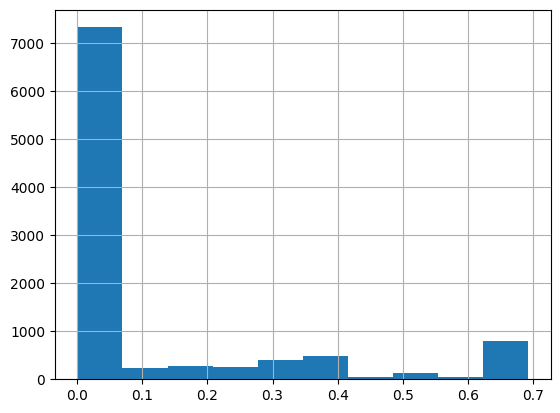

In [20]:
customer_data["weekend_prop_log1p"] = np.log1p(customer_data["weekend_prop"])
customer_data["weekend_prop_log1p"].hist()

<Axes: >

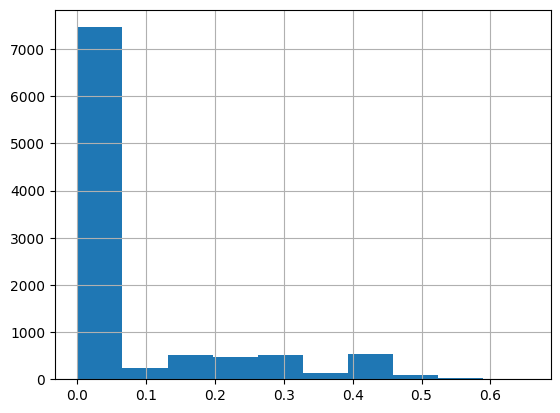

In [21]:
customer_data["bounce_prop_log1p"] = np.log1p(customer_data["bounce_prop"])
customer_data["bounce_prop_log1p"].hist()

<Axes: >

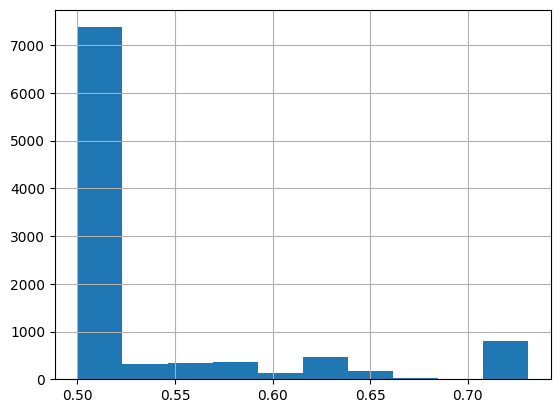

In [22]:
col = "weekend_prop"
customer_data[f'{col}_sigmoid'] = 1 / (1 + np.exp(-customer_data[col]))
customer_data[f'{col}_sigmoid'].hist()

<Axes: >

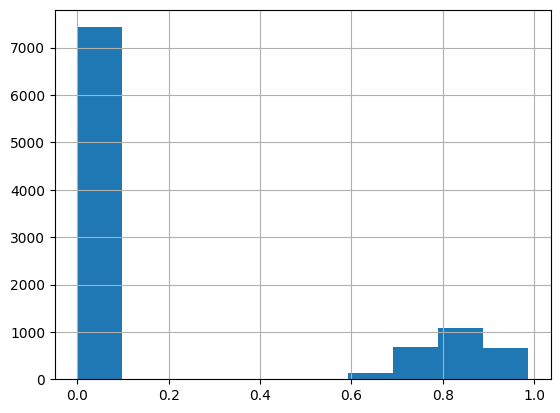

In [23]:
col = "bounce_prop"
power = 1/6
customer_data[f"{col}_power_{power}"] = np.power(customer_data[f"{col}"], power)
customer_data[f"{col}_power_{power}"].hist()

In [24]:
numerical_columns = ['hour', 'totals.hits_log','totals.pageviews_log', 'bounce_prop_log1p', 'weekend_prop_log1p']
categorical_columns = ['channelGrouping', 'trafficSource.medium']  # Ajusta según tus columnas categóricas

In [27]:


# Transformación de las variables categóricas a One-Hot Encoding
encoder = OneHotEncoder(drop='first')
encoded_categorical = encoder.fit_transform(customer_data[categorical_columns])

# Combinar datos numéricos escalados con categóricos codificados
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(customer_data[numerical_columns])


In [28]:
encoded_categorical.shape

(9996, 13)

In [29]:
encoded_categorical.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [30]:
scaled_numerical.shape

(9996, 5)

In [31]:
processed_data = np.hstack((scaled_numerical, encoded_categorical.toarray()))
processed_data.shape


(9996, 18)

## Segmentación de Clientes

### Segmentación con KMeans

In [32]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)
    inertia.append(kmeans.inertia_)

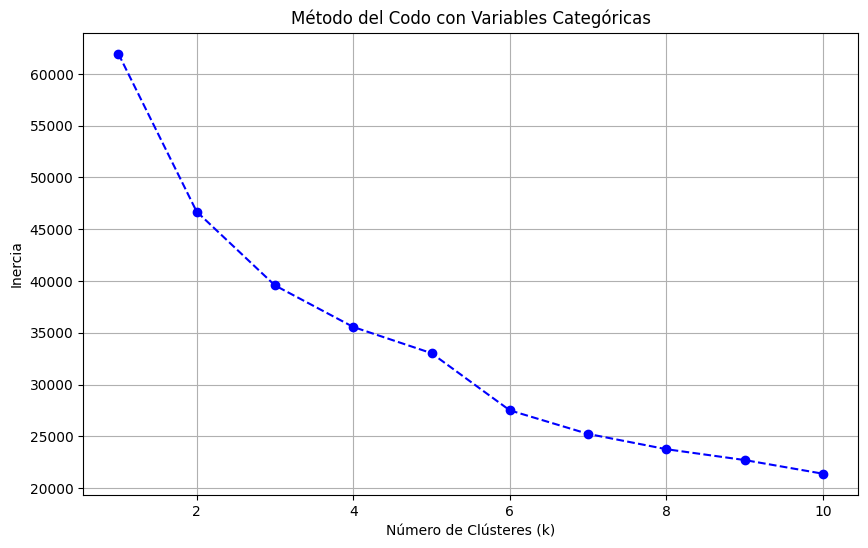

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title('Método del Codo con Variables Categóricas')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid()
plt.show()

In [34]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(processed_data)

customer_data['Cluster_KMeans'] = clusters

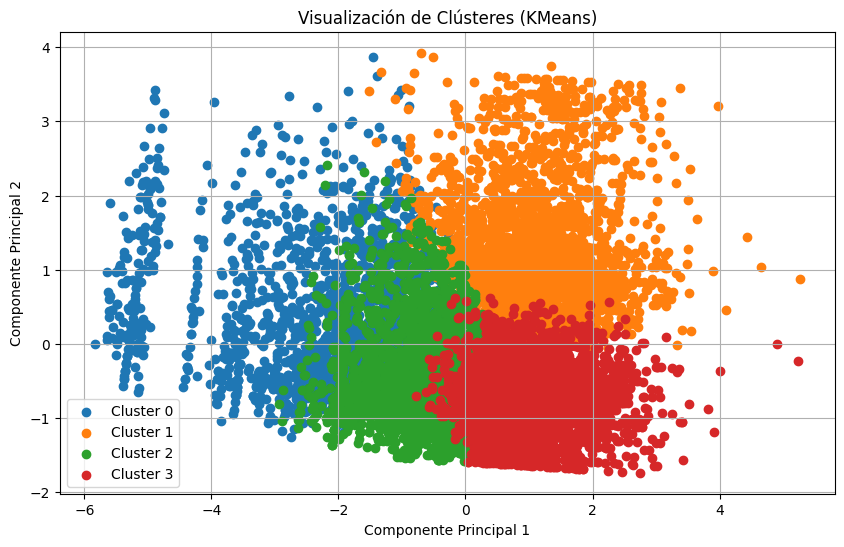

In [74]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(processed_data)


plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    plt.scatter(
        pca_data[clusters == cluster, 0],
        pca_data[clusters == cluster, 1],
        label=f'Cluster {cluster}'
    )

plt.title('Visualización de Clústeres (KMeans)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid()
plt.show()

In [35]:
print("\nTamaño de cada cluster:")
print(customer_data['Cluster_KMeans'].value_counts())


Tamaño de cada cluster:
Cluster_KMeans
3    3387
2    2608
1    2299
0    1702
Name: count, dtype: int64


In [36]:
silhouette_avg = silhouette_score(processed_data, clusters)
print(f"\nCoeficiente de silueta promedio: {silhouette_avg:.3f}")


Coeficiente de silueta promedio: 0.174


### Usando DBSCAN

In [37]:
dbscan = DBSCAN(eps=1, min_samples=150)
dbscan_clusters = dbscan.fit_predict(processed_data)


customer_data['Cluster_DBSCAN'] = dbscan_clusters

In [38]:
if len(set(dbscan_clusters)) > 1:
    score = silhouette_score(processed_data, dbscan_clusters)
    print(f"Silhouette Score: {score:.2f}")
else:
    print("DBSCAN encontró solo un clúster o todo es ruido.")

Silhouette Score: 0.11


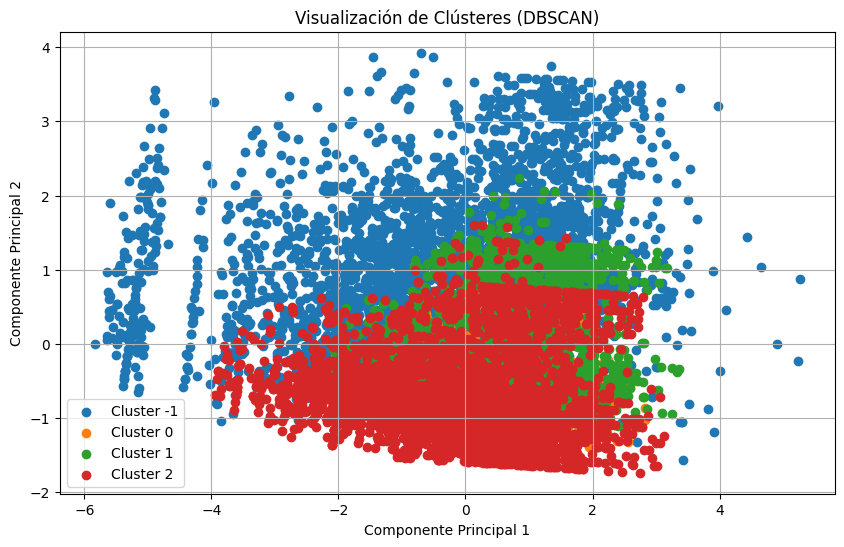

In [39]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(processed_data)


plt.figure(figsize=(10, 6))
for cluster in np.unique(dbscan_clusters):
    plt.scatter(
        pca_data[dbscan_clusters == cluster, 0],
        pca_data[dbscan_clusters == cluster, 1],
        label=f'Cluster {cluster}'
    )

plt.title('Visualización de Clústeres (DBSCAN)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid()
plt.show()

### Usano clustering jerarquico

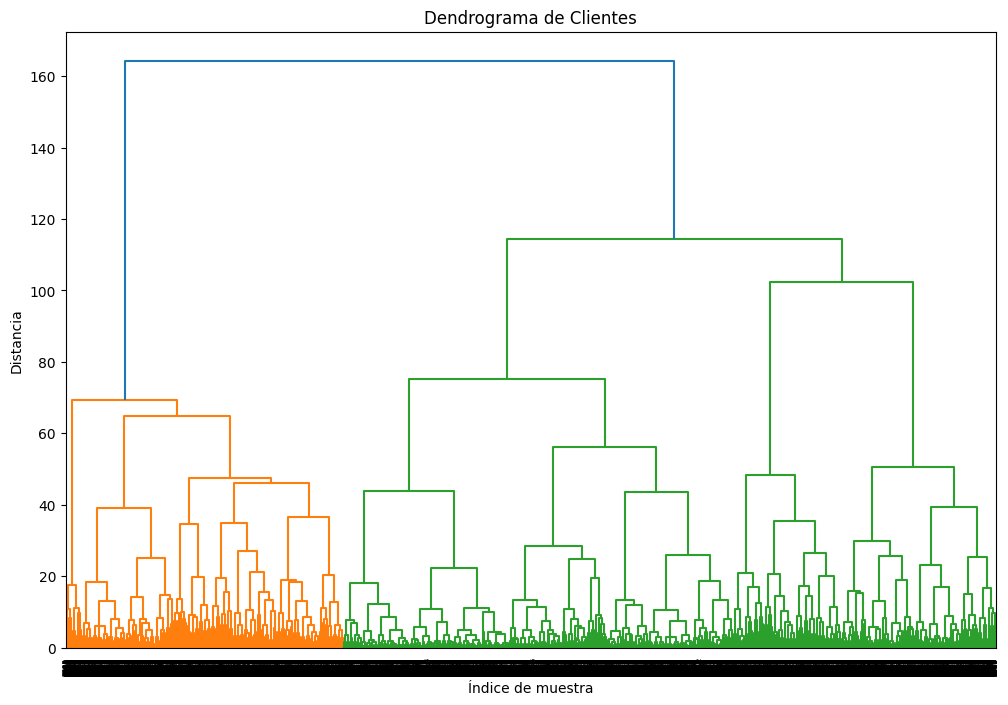

Distribución de clusters (Jerárquico):
0    4196
1    2989
2    1647
3    1164
Name: count, dtype: int64


In [40]:
plt.figure(figsize=(12, 8))
linkage_matrix = linkage(processed_data, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrograma de Clientes')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

n_clusters = 4 
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
clusters_hierarchical = hierarchical.fit_predict(processed_data)


print("Distribución de clusters (Jerárquico):")
print(pd.Series(clusters_hierarchical).value_counts())

In [41]:
hierarchical_silhouette = silhouette_score(processed_data, clusters_hierarchical)
print(f"Hierarchical: {hierarchical_silhouette:.3f}")

Hierarchical: 0.211


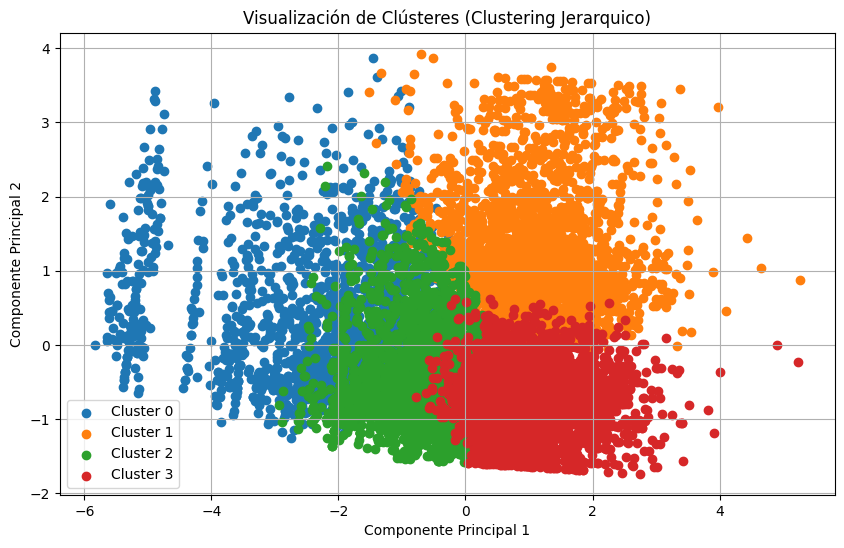

In [42]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(processed_data)


plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters_hierarchical):
    plt.scatter(
        pca_data[clusters == cluster, 0],
        pca_data[clusters == cluster, 1],
        label=f'Cluster {cluster}'
    )

plt.title('Visualización de Clústeres (Clustering Jerarquico)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid()
plt.show()

### Gaussian Mixture Model

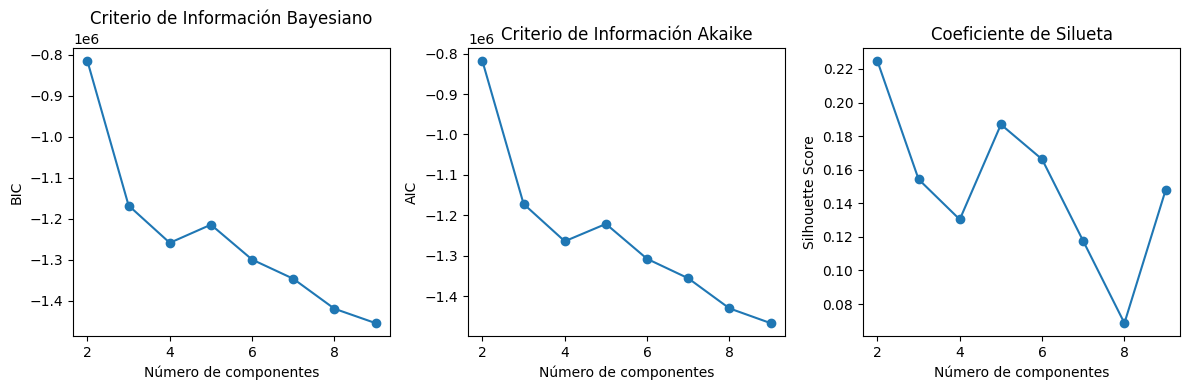

In [43]:
n_components_range = range(2, 10)
bic = []
aic = []
silhouette_scores = []

for n_components in n_components_range:

    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm_labels = gmm.fit_predict(processed_data)
    

    bic.append(gmm.bic(processed_data))
    aic.append(gmm.aic(processed_data))
    silhouette_scores.append(silhouette_score(processed_data, gmm_labels))


plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(n_components_range, bic, 'o-', label='BIC')
plt.xlabel('Número de componentes')
plt.ylabel('BIC')
plt.title('Criterio de Información Bayesiano')

plt.subplot(132)
plt.plot(n_components_range, aic, 'o-', label='AIC')
plt.xlabel('Número de componentes')
plt.ylabel('AIC')
plt.title('Criterio de Información Akaike')

plt.subplot(133)
plt.plot(n_components_range, silhouette_scores, 'o-', label='Silhouette')
plt.xlabel('Número de componentes')
plt.ylabel('Silhouette Score')
plt.title('Coeficiente de Silueta')

plt.tight_layout()
plt.show()

In [44]:
n_components_optimal = 4
gmm_final = GaussianMixture(n_components=n_components_optimal, random_state=42)
gmm_labels = gmm_final.fit_predict(processed_data)


silhouette_avg = silhouette_score(processed_data, gmm_labels)
print(f"Silhouette Score para {n_components_optimal} componentes: {silhouette_avg:.3f}")

Silhouette Score para 4 componentes: 0.130


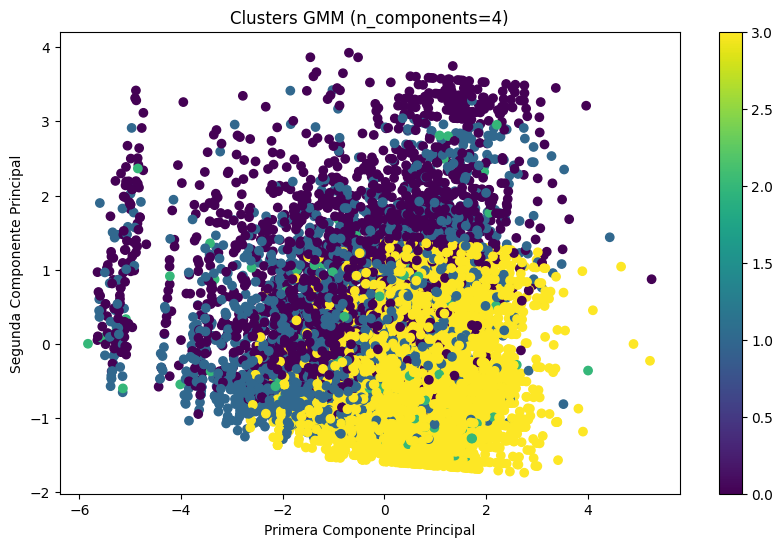

In [45]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(processed_data)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], 
                     c=gmm_labels, cmap='viridis')
plt.title(f'Clusters GMM (n_components={n_components_optimal})')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.colorbar(scatter)
plt.show()

## Análisis e interpretación de resultados

In [46]:
cluster_summary_numeric = customer_data.groupby('Cluster_KMeans')[['weekend_prop', 'hour', 'totals.hits', 'totals.pageviews', 'bounce_prop']].mean()
cluster_summary_numeric


,weekend_prop,hour,totals.hits,totals.pageviews,bounce_prop
Cluster_KMeans,,,,,
0,0.135654,14.865746,7.281140,6.141598,0.386155
1,0.430551,7.447368,32.341888,25.296868,0.017836
2,0.077643,16.146472,9.348735,7.977952,0.031542
3,0.013672,17.685120,32.642752,25.336876,0.013685


In [47]:
# Resumen para categóricas
cluster_summary_categorical = customer_data.groupby('Cluster_KMeans')[categorical_columns].agg(lambda x: x.value_counts(normalize=True).idxmax())
cluster_summary_categorical

,channelGrouping,trafficSource.medium
Cluster_KMeans,,
0,Referral,referral
1,Organic Search,organic
2,Referral,referral
3,Referral,referral


In [48]:
cluster_summary_detailed = {}

for col in categorical_columns:
    distribution = customer_data.groupby('Cluster_KMeans')[col].value_counts(normalize=True).unstack() * 100
    
    print(f"\nDistribución porcentual de {col} por cluster:")
    print(distribution.round(2))  
    
    cluster_summary_detailed[col] = distribution


Distribución porcentual de channelGrouping por cluster:
channelGrouping  (Other)  Affiliates  Direct  Display  Organic Search  \
Cluster_KMeans                                                          
0                    NaN        0.12   21.86     1.41           33.31   
1                    NaN        0.13   16.40     0.35           46.28   
2                    NaN        0.08   15.15     1.76           19.67   
3                   0.03        0.12   20.84     1.86           32.15   

channelGrouping  Paid Search  Referral  Social  
Cluster_KMeans                                  
0                       5.17     37.37    0.76  
1                       6.05     30.06    0.74  
2                       2.26     60.24    0.84  
3                       3.37     40.98    0.65  

Distribución porcentual de trafficSource.medium por cluster:
trafficSource.medium  (none)  (not set)  affiliate   cpc   cpm  organic  \
Cluster_KMeans                                                           

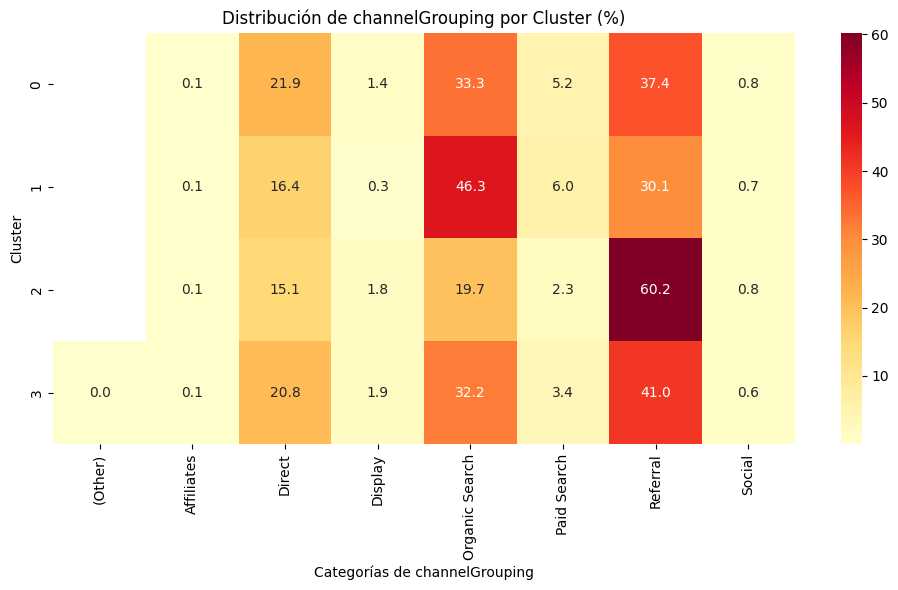

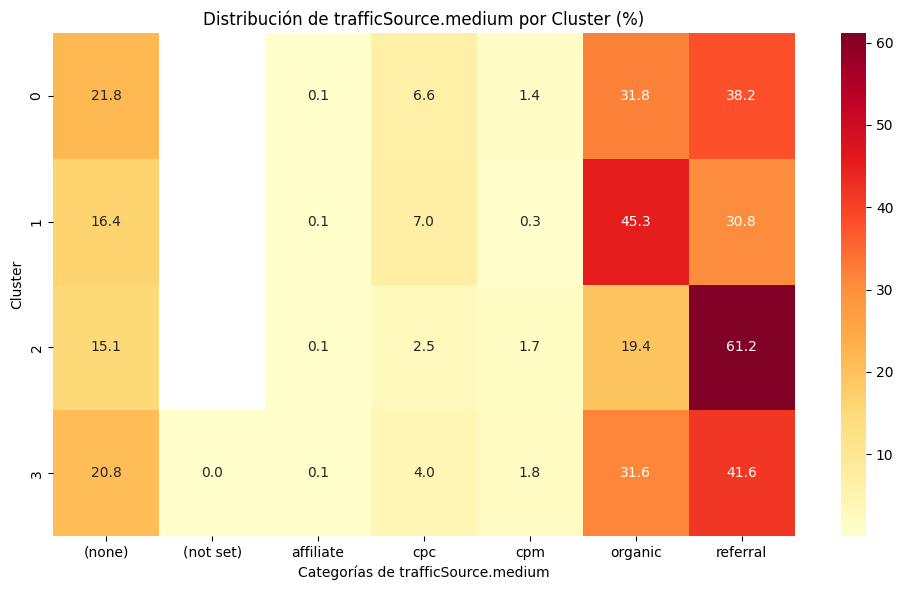

In [49]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.heatmap(cluster_summary_detailed[col], 
                annot=True, 
                fmt='.1f',  
                cmap='YlOrRd')
    plt.title(f'Distribución de {col} por Cluster (%)')
    plt.ylabel('Cluster')
    plt.xlabel(f'Categorías de {col}')
    plt.tight_layout()
    plt.show()

<Figure size 2000x1500 with 0 Axes>

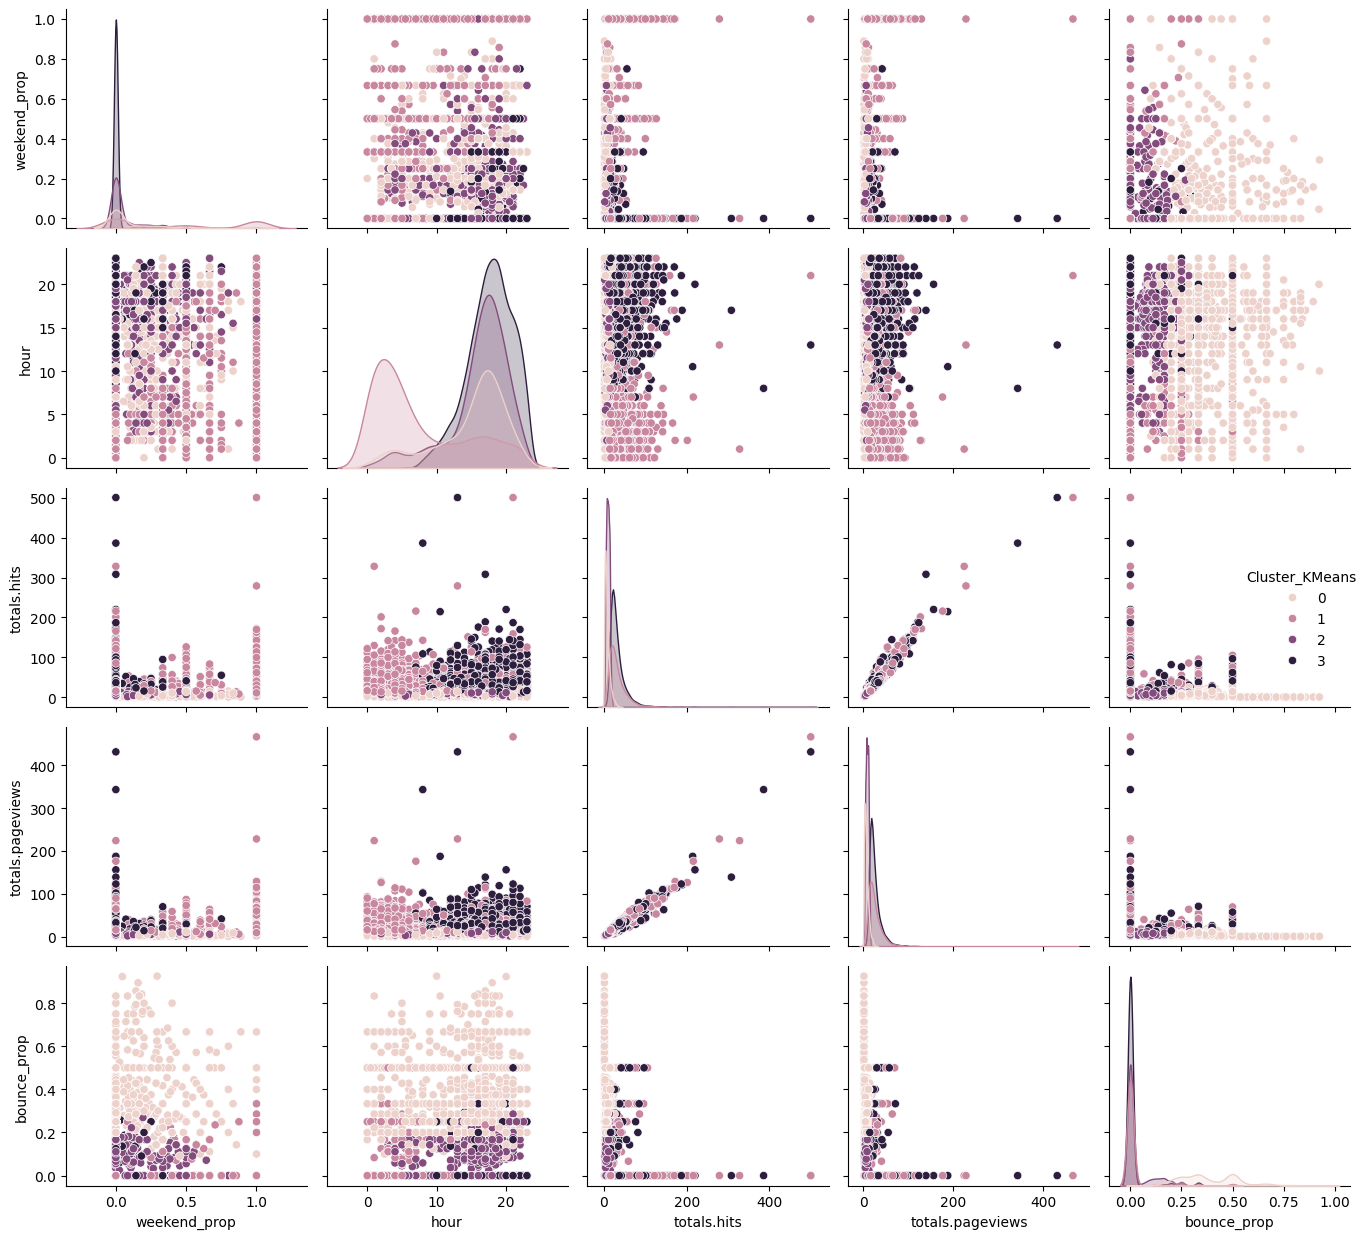

In [50]:

columns_to_analyze = ['weekend_prop', 'hour', 'totals.hits', 'totals.pageviews', 'bounce_prop']  + ['Cluster_KMeans']
plt.figure(figsize=(20, 15))
sns.pairplot(customer_data[columns_to_analyze], diag_kind='kde', hue='Cluster_KMeans')
plt.tight_layout()
plt.grid()
plt.show()